# Importing packages

In [1]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import random
from skimage import io
from PIL import Image
import pathlib
from tensorflow import keras
import tensorflow as tf
from skimage.morphology import binary_closing, binary_dilation, binary_erosion, binary_opening
from skimage.morphology import selem
from skimage import transform

# Data loading:

In [2]:
data_dir = pathlib.Path(r'C:\Users\mybes\Documents\upgrad\5.Deep learning\CNN\Codes and datasets\flowers\flowers')

# Directory for the dataset

In [3]:
flower_cls=os.listdir(data_dir)           # classes present in the dataset
flower_cls

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

# Here we used glob to identify and count all of the jpg images in the directory. 
# This function travers through all the sub floders(classes) and count jpg images.
# count of all images

4323


# Data Visualization:

In [5]:
# Now we try to visualize any image from the dataset.

# So select any one class to visualize a image i.e rose ... So lets define the path for rose class

rose_path=os.path.join(data_dir,flower_cls[2],'*')
rose_path

'C:\\Users\\mybes\\Documents\\upgrad\\5.Deep learning\\CNN\\Codes and datasets\\flowers\\flowers\\rose\\*'

In [6]:
#  Now Glob through the Rose directory and access individual files
rose_path=glob.glob(rose_path)

# Now rose_path is a list of all the images present in the rose class.
print(len(rose_path))

784


In [7]:
# We can access any image individually.
rose_path[76]

'C:\\Users\\mybes\\Documents\\upgrad\\5.Deep learning\\CNN\\Codes and datasets\\flowers\\flowers\\rose\\14970973709_968910640e_n.jpg'

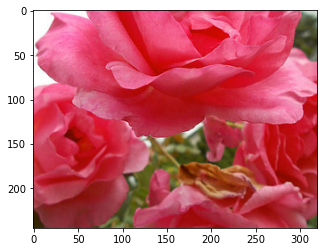

In [8]:
# Now read the image to display it.
image=io.imread(rose_path[76])
plt.imshow(image)

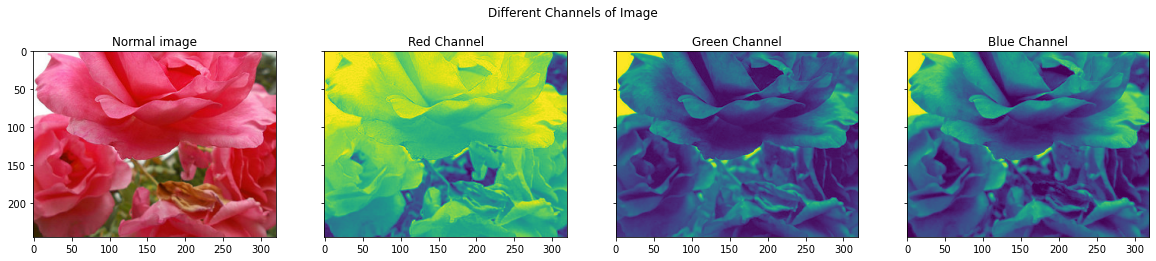

In [9]:
# Plot RGB channels of same image distinctively
f,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,sharey=True)
f.set_figwidth(20)           # set the width of each image.

# Normal image
ax1.set_title('Normal image')
ax1.imshow(image)

# Red channel of image
ax2.set_title('Red Channel')
ax2.imshow(image[:,:,0])

# Green channel of image
ax3.set_title('Green Channel')
ax3.imshow(image[:,:,1])

# Blue channel of image
ax4.set_title('Blue Channel')
ax4.imshow(image[:,:,2])

f.suptitle('Different Channels of Image')
plt.show()

# Data Transformations:

## Morphological Transformations

In [10]:
# Now we define a function to plot multiple images so that we dont need to define subplots multiple times.

# function to plot n images using subplots
def plot_image(images, captions=None, cmap=None ):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(20)
    f.set_figheight(50)
    for ax,image in zip(axes, images):
        ax.imshow(image, cmap)

### Thresolding:

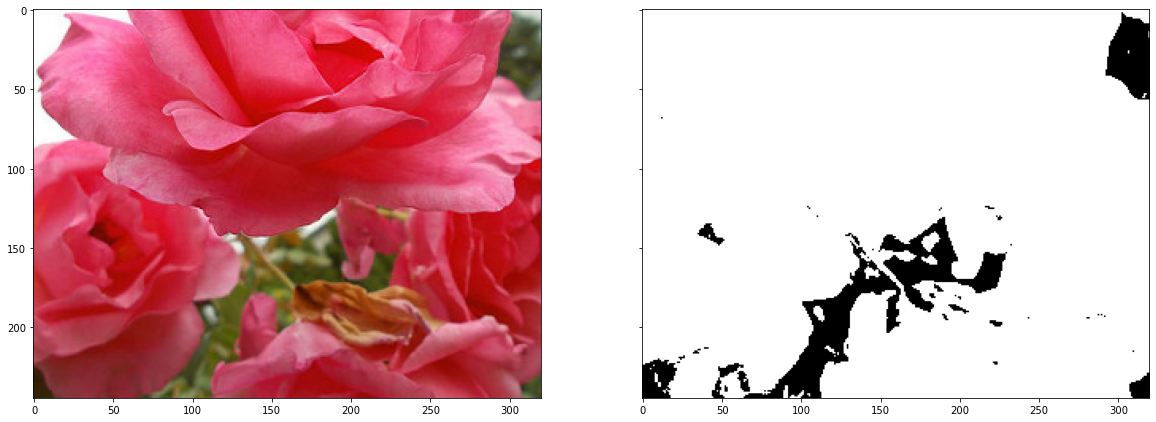

In [11]:
thresold=125 # 125 is midway between 0-255.
bin_image=image[:, :, 0] > thresold
plot_image([image, bin_image], cmap='gray')

### Erosion, Dilation, Opening & Closing

**Erosion** shrinks bright regions and enlarges dark regions. **Dilation** on the other hand is exact opposite side - it shrinks dark regions and enlarges the bright regions. 

**Opening** is erosion followed by dilation. Opening can remove small bright spots (i.e. “salt”) and connect small dark cracks. This tends to “open” up (dark) gaps between (bright) features.

**Closing** is dilation followed by erosion. Closing can remove small dark spots (i.e. “pepper”) and connect small bright cracks. This tends to “close” up (dark) gaps between (bright) features.

All these can be done using the `skimage.morphology` module. The basic idea is to have a **circular disk** of a certain size (3 below) move around the image and apply these transformations using it.

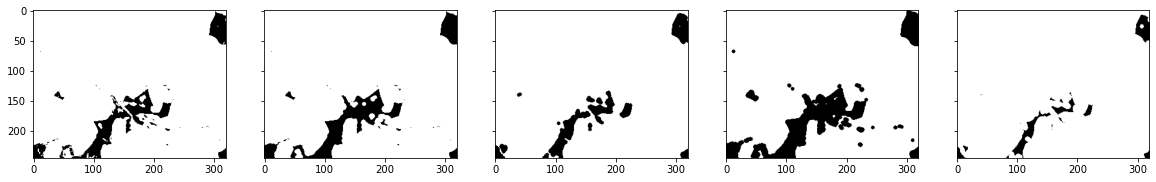

In [12]:
# use a disk of radius 3
selem = selem.disk(3)

# oprning and closing
open_img = binary_opening(bin_image, selem)
close_img = binary_closing(bin_image, selem)

# erosion and dilation
eroded_img = binary_erosion(bin_image, selem)
dilated_img = binary_dilation(bin_image, selem)

plot_image([bin_image, open_img, close_img, eroded_img, dilated_img], cmap='gray')

## Normalization

In [13]:
#   Now we will perform four types of normalization
#   Norm1= /255
#   Norm2= min-max
#   Norm3=with mean and standard deviation 
#   Norm4=With percentile..          

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


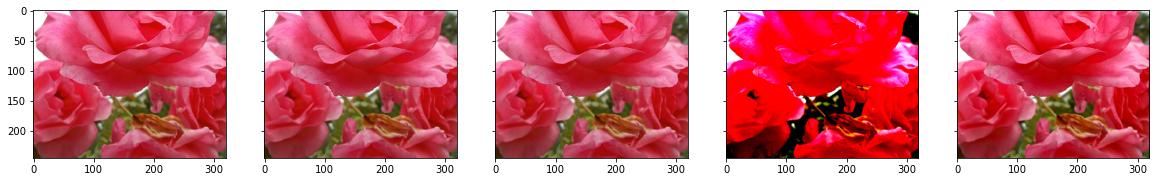

In [14]:
Norm1=image/255

Norm2=(image-np.min(image))/(np.max(image)-np.min(image))

Norm3=(image-np.mean(image))/(np.std(image))

Norm4=(image-np.percentile(image,5))/(np.percentile(image,95)-np.percentile(image,5))

plot_image([image,Norm1,Norm2,Norm3,Norm4])

## Data Augmentation:

Examples are Flipping , rotation , scaling , zooming , pooling , translation ......

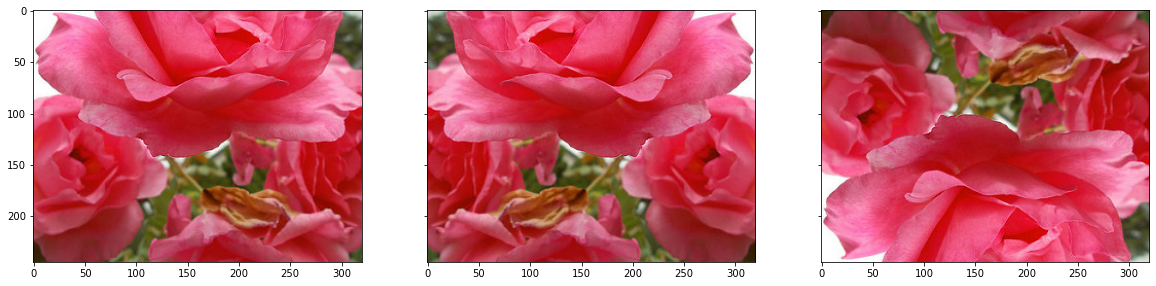

In [15]:
# we can flip an image either left-right or up-down

# lr (left-right)
image_flipr = np.fliplr(image)

# ud (Up-Down)
image_flipud = np.flipud(image)

plot_image([image, image_flipr, image_flipud])

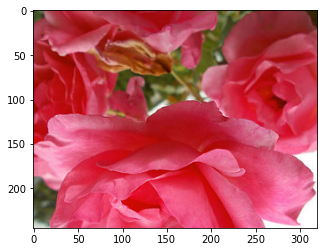

In [16]:
# performing both flips on the same image
image_flipboth=np.flipud(np.fliplr(image))
plt.imshow(image_flipboth)
plt.show()